# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        - target: 사용자가 다음달에도 구독을 게속할지(1) 취소할지(0)

목표: 유저들의 학습 습관, 선호도, 이용 행태 도출 -> 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측



1) 문제 정의 및 가설 설정하기 → 2) 데이터 분석 기본 세팅 하기 → 3) 데이터 분석하기 → 4) 분석 결과 시각화 하기 → 5) 최종 결론 내리기

# 문제 정의 및 가설 설정하기
## 목표
- 유저들의 학습 습관, 선호도, 이용 행태 도출 등 면밀히 분석-> 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측
- 1.서비스 만족도 2. 구독 결정 요인 분석하기
## 구독 여정
0. 가입한다.
1. 마음을 먹고 구독을 결제한다.
2. 어떤 학습 세션이 있는지 탐색하며 여러가지를 수강해본다.
    - 수강 시간이 짧은 세션은 필터링할 필요가 있다.
3. 마음에 드는 세션을 선택해 꾸준히 수강한다.
    - 이 단계에서 만족도가 올라게 된다.
    - 수강 과정에서 만족도에 영향을 미치는 요소가 무엇인지 파악해야 한다.
4. 구독 연장을 결심한다.
## 가설 설정하기
- 3번째 '세션 수강 단계'에서 만족도가 좌우된다. 만족도가 높을 수록 구독을 연장할 것이다.
## 필요 메타데이터
- 만족도 상관관계 파악하기: 지난달 기준, 다음 달에 구독 연장했는지 여부
    -  각 요소 별 관계성 파악해보기 -> 그것을 만족도 관련 요소로 쓰기
- '세션 수강 단계'에서 만족도 관련 요소
    - average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
    - monthly_active_learning_days: 월간 활동적인 학습 일수
    - total_completed_courses: 완료한 총 코스 수
        - 가입 기간이 길 수록 많을 것이니 가공 필요함.
        - 총 코스 수/가입 개월수
    - recent_learning_achievement: 최근 학습 성취도
        - 최근의 범위?
    - abandoned_learning_sessions: 중단된 학습 세션 수
- 유저 정보
    - user_id: 사용자의 고유 식별자
- 결제 정보
    - payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
        - 구독 '연장'이 목표이므로 직전 달에 결제한 사용자만 필터링해야함

# 데이터 분석 기본 세팅 하기

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [17]:
user_data = pd.read_table('data/mini.csv',sep=',')
user_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [3]:
# 결측치 체크
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
user_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


# 데이터 전처리
## 만족도에 영향을 미치는 요소가 무엇인지 파악하기
지난달 결제한 사용자만 추출해서 각 요소와 비교하기 -> 상관 있는 요소 파악하기

- 지난달 결제한 사용자
    - payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
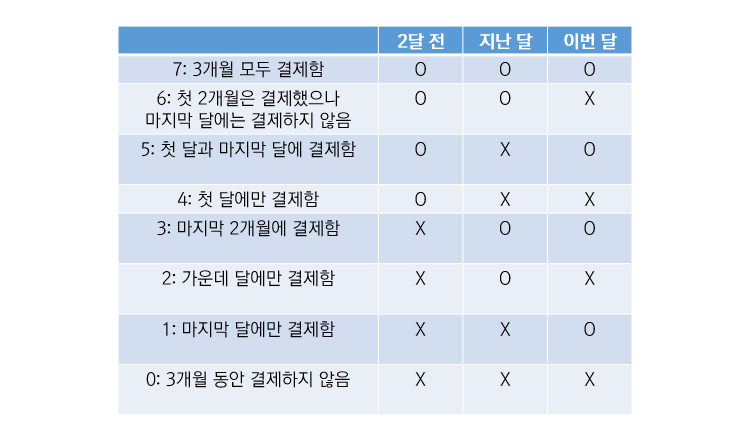
- '세션 수강 단계'에서 만족도 관련 요소
    - average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
    - monthly_active_learning_days: 월간 활동적인 학습 일수
    - total_completed_courses: 완료한 총 코스 수
        - 가입 기간이 길 수록 많을 것이니 가공 필요함.
        - 총 코스 수/가입 개월수
    - recent_learning_achievement: 최근 학습 성취도
        - 최근의 범위?
    - abandoned_learning_sessions: 중단된 학습 세션 수

### 각 단계별 사람 수 추출

In [30]:
인원수 = user_data.groupby('payment_pattern')['user_id'].count()
인원수

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64

### 각 요소 넣어보기
#### average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)

In [29]:
평균시간 = user_data.groupby('payment_pattern')['average_time_per_learning_session'].sum()
평균시간

payment_pattern
0    66546.803814
1    74236.038080
2    65375.055224
3    68499.327316
4    69576.883099
5    67509.511644
6    67845.982641
7    69587.602743
Name: average_time_per_learning_session, dtype: float64

In [32]:
개인평균시간 = 평균시간/인원수

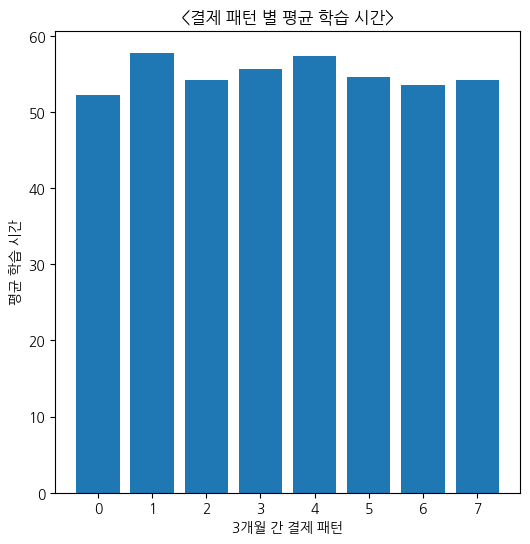

In [42]:
# 바그래프 그리기 

plt.figure(figsize=(6,6))
plt.bar(개인평균시간.index, 개인평균시간)

plt.title('<결제 패턴 별 평균 학습 시간>')
plt.xlabel('3개월 간 결제 패턴')
plt.ylabel('평균 학습 시간')

plt.show()

#### monthly_active_learning_days: 월간 활동적인 학습 일수

In [43]:
평균일수 = user_data.groupby('payment_pattern')['monthly_active_learning_days'].sum()
평균일수

payment_pattern
0    16253
1    16337
2    14745
3    15240
4    15235
5    15529
6    16038
7    16077
Name: monthly_active_learning_days, dtype: int64

In [44]:
개인평균일수 = 평균일수/인원수

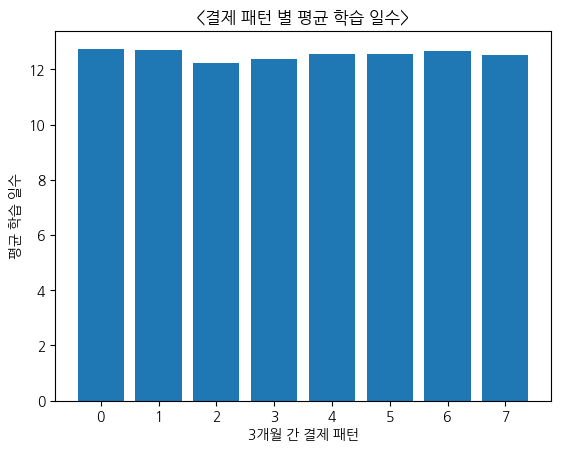

In [52]:
# 바그래프 그리기 

plt.bar(개인평균일수.index, 개인평균일수)

plt.title('<결제 패턴 별 평균 학습 일수>')
plt.xlabel('3개월 간 결제 패턴')
plt.ylabel('평균 학습 일수')

plt.show()

#### total_completed_courses: 완료한 총 코스 수

In [46]:
평균코스수 = user_data.groupby('payment_pattern')['total_completed_courses'].sum()
평균코스수

payment_pattern
0    15602
1    15886
2    14736
3    15192
4    14779
5    14986
6    15467
7    15627
Name: total_completed_courses, dtype: int64

In [48]:
개인평균코스수 = 평균코스수/인원수

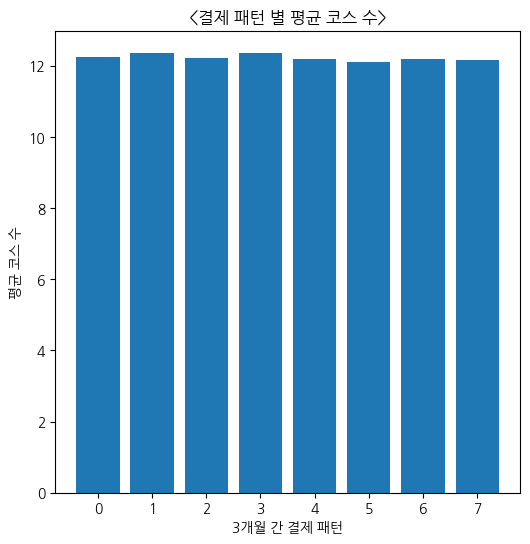

In [49]:
# 바그래프 그리기 

plt.figure(figsize=(6,6))
plt.bar(개인평균코스수.index, 개인평균코스수)

plt.title('<결제 패턴 별 평균 코스 수>')
plt.xlabel('3개월 간 결제 패턴')
plt.ylabel('평균 코스 수')

plt.show()

#### recent_learning_achievement: 최근 학습 성취도

In [51]:
평균코스수 = user_data.groupby('payment_pattern')['abandoned_learning_sessions'].sum()
평균코스수

payment_pattern
0    3742
1    3884
2    3817
3    3758
4    3642
5    3816
6    3847
7    3930
Name: abandoned_learning_sessions, dtype: int64

In [48]:
개인평균코스수 = 평균코스수/인원수

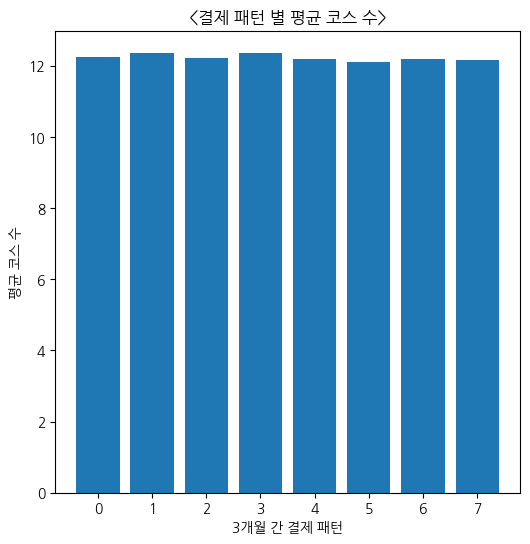

In [49]:
# 바그래프 그리기 

plt.figure(figsize=(6,6))
plt.bar(개인평균코스수.index, 개인평균코스수)

plt.title('<결제 패턴 별 평균 코스 수>')
plt.xlabel('3개월 간 결제 패턴')
plt.ylabel('평균 코스 수')

plt.show()